In [1]:
#from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from sklearn import datasets

### Set up data

The below cell reads in the data, and defines a function which finds the min/max intervals for a given feature. This will be used later to compute the fuzzy membership function.

In [2]:
df_wine = pd.read_csv('wine_clean.csv')

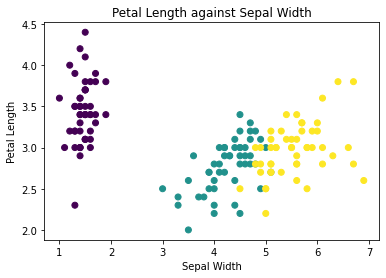

In [3]:


iris = datasets.load_iris()
#sepal length
iris_col_1 = iris.data[:,:1]
#sepal width
iris_col_2 = iris.data[:,1:2]
#petal length
iris_col_3 = iris.data[:,2:3]
#petal width
iris_col_4 = iris.data[:,3:4]

iris_list = [iris_col_1,iris_col_2,iris_col_3,iris_col_4]
plt.scatter(iris_col_3,iris_col_2,c=iris.target)
plt.title('Petal Length against Sepal Width')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Width')
plt.show()

In [4]:
def get_intervals(feature_interval):
    max_interval = max(feature_interval)
    min_interval = min(feature_interval)
    interval_list = [min_interval, (max_interval + min_interval) / 2, max_interval]
    return interval_list

feature_intervals = get_intervals(df_wine['Color intensity'])
print(feature_intervals)

[1.28, 7.14, 13.0]


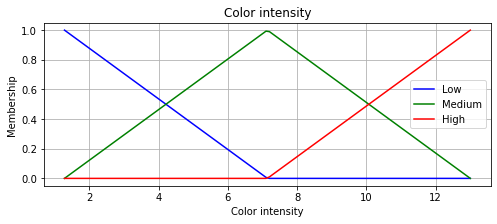

In [5]:
def get_fuzzy_boundaries(intervals,data):
    low = [min(data), min(data), intervals[1]]
    med = [min(data), intervals[1], max(data)]
    high = [intervals[1], max(data), max(data)]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, df_wine['Color intensity'])
df_wine.sort_values(['Color intensity'], inplace=True)

qual_lo = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[0])
qual_md = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[1])
qual_high = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(df_wine['Color intensity'].values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(df_wine['Color intensity'].values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(df_wine['Color intensity'].values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Color intensity')
ax0.legend()
ax0.grid()
plt.ylabel('Membership')
plt.xlabel('Color intensity')
plt.show()

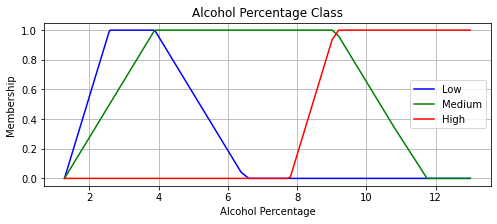

In [6]:
#Color intensity
df_wine.sort_values(['Color intensity'], inplace=True)
feature_name = df_wine['Color intensity']
feature_intervals = np.linspace(min(feature_name), max(feature_name), num=10)

def get_fuzzy_boundaries(intervals,data):
    low = [feature_intervals[0],feature_intervals[1],feature_intervals[2],feature_intervals[4]]
    med = [feature_intervals[0],feature_intervals[2],feature_intervals[6],feature_intervals[8]]
    high = [feature_intervals[5],feature_intervals[6],feature_intervals[9],feature_intervals[9]]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, feature_name)

qual_lo = fuzz.trapmf(feature_name.values, fuzzy_boundaries[0])
qual_md = fuzz.trapmf(feature_name.values, fuzzy_boundaries[1])
qual_high = fuzz.trapmf(feature_name.values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(feature_name.values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(feature_name.values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(feature_name.values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Alcohol Percentage Class')
ax0.legend()
ax0.grid()
plt.ylabel('Membership ')
plt.xlabel('Alcohol Percentage')
plt.show()

fuzzy partition coefficient:  1.0


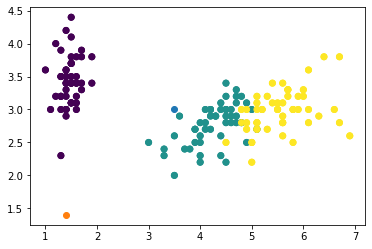

fuzzy partition coefficient:  1.0


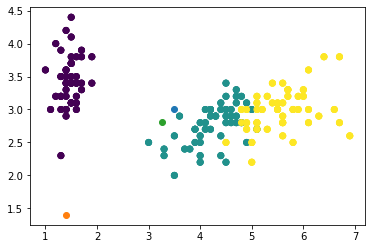

fuzzy partition coefficient:  0.6666666666666667


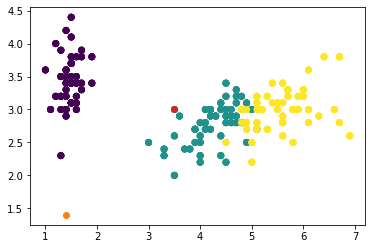

fuzzy partition coefficient:  0.6666666666666667


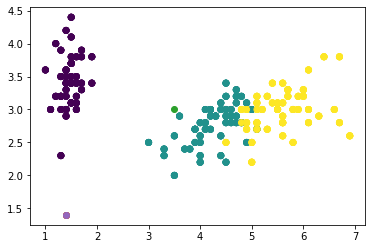

In [7]:
chosen_columns = np.hstack((iris_col_3,iris_col_2))
for x in range(2,6):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(chosen_columns, c = x, m = 2, 
                                                 error = 0.005, maxiter = 1000, init=None)
    print('fuzzy partition coefficient: ',fpc)
    for x in cntr:
        plt.scatter(x[0],x[1])
        plt.scatter(iris_col_3,iris_col_2,c=iris.target)
    plt.show()

ok 1.3999999999999997 1.3999999999999997
ok 1.3999999999999997 1.3999999999999997
ok 3.5 3.0
ok 1.3999999999999997 1.3999999999999997
ok 1.400000318175278 1.4000002424192595


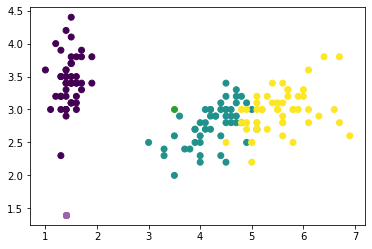

In [8]:
for x in cntr:
    print('ok',x[0],x[1])
    plt.scatter(x[0],x[1])
plt.scatter(iris_col_3,iris_col_2,c=iris.target)
plt.show()